In [1]:
import pywt
import torch
import numpy as np
from models import get_model
from torchview import draw_graph

In [2]:
x = np.random.randn(1, 1, 256, 256).astype(np.float32)
print(x.dtype)
x1, _ = pywt.dwt2(x, 'db1')
x2, _ = pywt.dwt2(x1, 'db1')
x3, _ = pywt.dwt2(x2, 'db1')
x4, _ = pywt.dwt2(x3, 'db1')

float32


In [3]:
x = torch.from_numpy(x)
print(x.dtype)
x1 = torch.from_numpy(x1)
x2 = torch.from_numpy(x2)
x3 = torch.from_numpy(x3)
x4 = torch.from_numpy(x4)

torch.float32


In [4]:
# Simulate input data with wavelet decomposition
input_data = [(x, x1, x2, x3, x4)]

ResNetBaseEncoder forward: 
inputs:  5
x:  torch.Size([1, 1, 256, 256])
x1:  torch.Size([1, 1, 128, 128])
x2:  torch.Size([1, 1, 64, 64])
x3:  torch.Size([1, 1, 32, 32])
x4:  torch.Size([1, 1, 16, 16])
c1:  torch.Size([1, 64, 128, 128])
x:  torch.Size([1, 64, 128, 128])
w:  torch.Size([1, 1, 128, 128])
c2:  torch.Size([1, 256, 64, 64])
x:  torch.Size([1, 256, 64, 64])
w:  torch.Size([1, 1, 64, 64])
c3:  torch.Size([1, 512, 32, 32])
x:  torch.Size([1, 512, 32, 32])
w:  torch.Size([1, 1, 32, 32])
c4:  torch.Size([1, 1024, 16, 16])
x:  torch.Size([1, 1024, 16, 16])
w:  torch.Size([1, 1, 16, 16])
c5:  torch.Size([1, 2048, 8, 8])


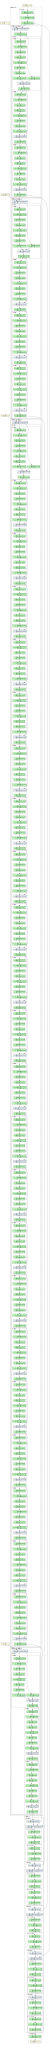

In [5]:
arch = 'unet'
encoder = 'resnet152'
parameters = {"in_channels": 1, "out_channels": 1, "wavelets_mode": True}
model = get_model(arch, parameters, encoder)
# We are using draw_graph to eval the model graph
model_graph = draw_graph(
    model,
    input_data = input_data,
    #input_size=(1, 1, 256, 256),
    depth=5,
    show_shapes=True,
    expand_nested=True,
    save_graph=True,
    filename=f"{arch}-{encoder}",
    directory="figures",
)
model_graph.visual_graph